In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data=pd.read_csv('/content/AAPL.csv')

In [ ]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-08-31 00:00:00+00:00,227.63,228.87,226.00,226.51,43340134,54.498229,54.795104,54.107981,54.230083,173360536,0.0,1.0
1,AAPL,2018-09-04 00:00:00+00:00,228.36,229.18,226.63,228.41,27390132,54.673002,54.869323,54.258813,54.684973,109560528,0.0,1.0
2,AAPL,2018-09-05 00:00:00+00:00,226.87,229.67,225.10,228.99,33332960,54.316273,54.986637,53.892507,54.823834,133331840,0.0,1.0
3,AAPL,2018-09-06 00:00:00+00:00,223.10,227.35,221.30,226.23,34289976,53.413675,54.431192,52.982726,54.163047,137159904,0.0,1.0
4,AAPL,2018-09-07 00:00:00+00:00,221.30,225.37,220.71,221.85,37619810,52.982726,53.957149,52.841471,53.114405,150479240,0.0,1.0


In [ ]:
dh=data['high']
dh.head()

0    228.87
1    229.18
2    229.67
3    227.35
4    225.37
Name: high, dtype: float64

In [ ]:
da=np.array(dh)
da=da.reshape(-1,1)
da

array([[228.87],
       [229.18],
       [229.67],
       ...,
       [179.15],
       [180.59],
       [184.9 ]])

In [ ]:
mm=MinMaxScaler()
data1=mm.fit_transform(da)

In [ ]:
data1

array([[0.29307322],
       [0.29383875],
       [0.29504877],
       ...,
       [0.17029263],
       [0.17384862],
       [0.18449191]])

In [ ]:
train_size=int(len(data1)*0.60)
test_size=int(len(data1)-train_size)

In [ ]:
train_size,test_size

(753, 503)

In [ ]:
train_data=data1[0:train_size,:]
test_data=data1[train_size:len(data1),:]

In [ ]:
train_data

array([[2.93073219e-01],
       [2.93838746e-01],
       [2.95048771e-01],
       [2.89319669e-01],
       [2.84430177e-01],
       [2.75737745e-01],
       [2.81787875e-01],
       [2.83516484e-01],
       [2.91789110e-01],
       [2.88060254e-01],
       [2.78454130e-01],
       [2.75737745e-01],
       [2.70230893e-01],
       [2.76799605e-01],
       [2.74527719e-01],
       [2.74280775e-01],
       [2.78133103e-01],
       [2.80429683e-01],
       [2.87072478e-01],
       [2.85590814e-01],
       [2.94431411e-01],
       [2.95863687e-01],
       [3.04432646e-01],
       [3.01666872e-01],
       [2.91937276e-01],
       [2.83022595e-01],
       [2.89122114e-01],
       [2.86850228e-01],
       [2.69934560e-01],
       [2.78281269e-01],
       [2.75688357e-01],
       [2.78552908e-01],
       [2.77688604e-01],
       [2.70527226e-01],
       [2.74280775e-01],
       [2.79466601e-01],
       [2.79194962e-01],
       [2.81615014e-01],
       [2.74577108e-01],
       [2.71638474e-01],


In [ ]:
def dataset(dataset,st):
  dx=[]
  dy=[]
  for i in range(len(dataset)-st-1):
    a=dataset[i:i+st,0]
    dx.append(a)
    b=dataset[i+st+1,0]
    dy.append(b)
  return np.array(dx),np.array(dy)

In [ ]:
x_train,y_train=dataset(train_data,100)
x_test,y_test=dataset(test_data,100)

In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
x_train.ndim

3

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='adam')


In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 7s 217ms/step - loss: 0.0491 - val_loss: 0.0037
Epoch 2/100
11/11 [==============================] - 1s 131ms/step - loss: 0.0163 - val_loss: 0.0036
Epoch 3/100
11/11 [==============================] - 2s 176ms/step - loss: 0.0135 - val_loss: 6.6239e-04
Epoch 4/100
11/11 [==============================] - 2s 143ms/step - loss: 0.0119 - val_loss: 5.5172e-04
Epoch 5/100
11/11 [==============================] - 1s 133ms/step - loss: 0.0100 - val_loss: 3.9315e-04
Epoch 6/100
11/11 [==============================] - 1s 130ms/step - loss: 0.0100 - val_loss: 9.6776e-04
Epoch 7/100
11/11 [==============================] - 1s 130ms/step - loss: 0.0097 - val_loss: 0.0021
Epoch 8/100
11/11 [==============================] - 1s 128ms/step - loss: 0.0081 - val_loss: 5.7622e-04
Epoch 9/100
11/11 [==============================] - 1s 132ms/step - loss: 0.0072 - val_loss: 5.4633e-04
Epoch 10/100
11/11 [==============================] - 1s 132ms/step

In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

13/13 [==============================] - 0s 26ms/step


In [ ]:
train_predict

In [ ]:
train_predict=mm.inverse_transform(train_predict)
test_predict=mm.inverse_transform(test_predict)

In [ ]:
train_predict

In [ ]:
import math
from sklearn.metrics import mean_squared_error as mse
math.sqrt(mse(y_train,train_predict))

224.661493113305

In [ ]:
math.sqrt(mse(y_test,test_predict))

160.05676287100243

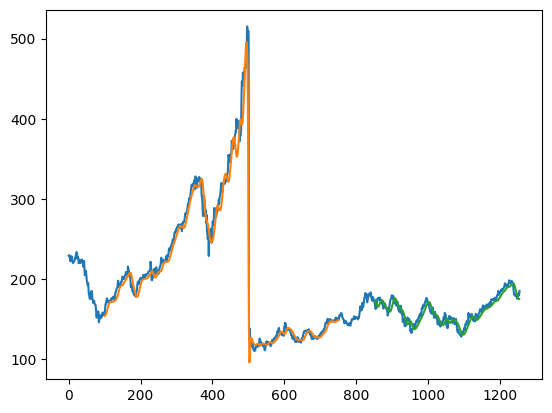

In [ ]:

look_back=100
trainPredictPlot = np.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = np.empty_like(data1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = test_predict
plt.plot(mm.inverse_transform(data1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

503

In [ ]:
x_input=test_data[403:].reshape(1,-1)
x_input.shape


(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
#next 50 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<50):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,151)

In [ ]:
len(data1)

1256

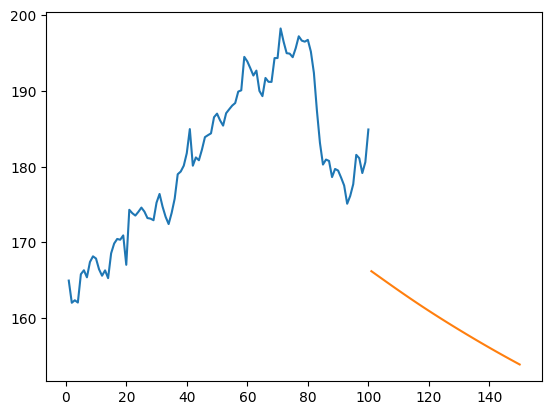

In [ ]:
plt.plot(day_new,mm.inverse_transform(data1[1156:]))
plt.plot(day_pred,mm.inverse_transform(lst_output))

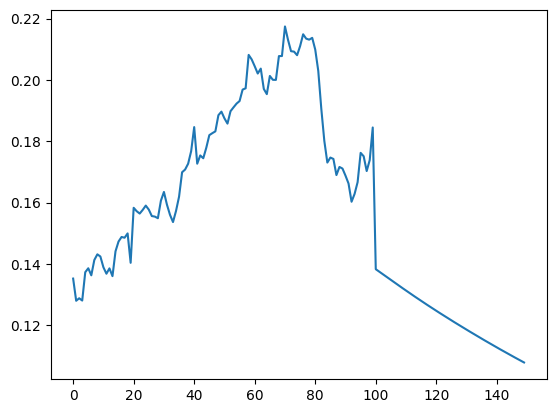

In [ ]:
df3=data1.tolist()
df3.extend(lst_output)
plt.plot(df3[1156:])